In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

import numpy.polynomial.polynomial as poly
from scipy.integrate import quad
import scipy.misc as misc

In [19]:
N = 7

In [3]:
def spanishU(x):
    return x

def derSpanishU(x):
    return 1

def B(w,v,derW,derV):
    return (w(2)*v(2) - quad(lambda x : derW(x)*derV(x),0,2)[0] + quad(lambda x: w(x)*v(x),0,2)[0])

def L(v,derV):
    return (spanishU(2)*v(2) - quad(lambda x: derSpanishU(x)*derV(x),0,2)[0] + quad(lambda x: spanishU(x)*v(x),0,2)[0])

def e(x,i):
    h = 2/N
    if abs(x-(i*h)) > h or x < 0 or x > 2:
        return 0
    elif x < i*h:
        return (N/2)*x - (i-1)
    elif x >= i*h:
        return -(N/2)*x + (i+1)
    
def getE(i):
    return lambda x: e(x,i)

def derE(x,i):
    h = 2/N
    if abs(x-(i*h)) > h or x < 0 or x > 2:
        return 0
    if x < i*h:
        return (N/2)
    if x >= i*h:
        return -(N/2)
    
def getDerE(i):
    return lambda x: derE(x,i)

[[ 1.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.         -6.80952381  3.54761905  0.          0.          0.
   0.        ]
 [ 0.          3.54761905 -6.80952381  3.54761905  0.          0.
   0.        ]
 [ 0.          0.          3.54761905 -6.80952381  3.54761905  0.
   0.        ]
 [ 0.          0.          0.          3.54761905 -6.80952381  3.54761905
   0.        ]
 [ 0.          0.          0.          0.          3.54761905 -6.80952381
   3.54761905]
 [ 0.          0.          0.          0.          0.          3.54761905
  -2.4047619 ]]
[[0.        ]
 [0.16326531]
 [0.24489796]
 [0.32653061]
 [0.40816327]
 [0.48979592]
 [1.27210884]]
[[0.        ]
 [0.35772792]
 [0.73266662]
 [1.11763026]
 [1.5046256 ]
 [1.88549576]
 [2.2525772 ]]
[0.]
[0.]
[0.35772792]
[0.73266662]
[1.11763026]
[1.5046256]
[1.88549576]
[2.2525772]


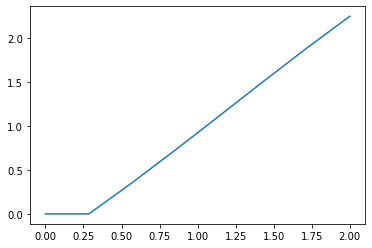

In [20]:
def createBMatrix():
    BMatrix = np.zeros((N,N))
    BMatrix[0][0] = 1
    for i in range(2,N+1):
        for j in range(2,N+1):
            ei = getE(i)
            derEi = getDerE(i)
            ej = getE(j)
            derEj = getDerE(j)
            BMatrix[i-1][j-1] = B(ei,ej,derEi,derEj)     
    print(BMatrix)
    return BMatrix

def createLMatrix():
    LMatrix = np.zeros((N,1))
    LMatrix[0][0] = 0
    for i in range(2,N+1):
        ei = getE(i)
        derEi = getDerE(i)
        LMatrix[i-1][0] = L(ei,derEi)
    print(LMatrix)
    return LMatrix

def getWeightMatrix(BMatrix,LMatrix):
    return np.linalg.solve(BMatrix,LMatrix)

def getSolution():
    weights = getWeightMatrix(createBMatrix(),createLMatrix())
    print(weights)
    return lambda x: sum([weights[i-1] * e(x,i) for i in range(1,N+1)])

def showSolution(u):
    x = []
    y = []
    for i in range (0,N+1):
        x.append(2*i/N)
        y.append(u(2*i/N))
        print(u(2*i/N))
    plt.plot(x,y)
    plt.show()
    
showSolution(getSolution())